# Jogadores com passes mais importantes na Bundesliga

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 5000
pd.options.display.max_columns = 50

In [34]:
# Temporada 2020/21
#df_raw = pd.read_html('https://fbref.com/en/share/j5J5P')[0]

# Temporada 2021/22
#df_raw = pd.read_html('https://fbref.com/en/share/AO9Wu')[0] # rodada 2
#df_raw = pd.read_html('https://fbref.com/en/share/sX2eO')[0] # rodada 3
#df_raw = pd.read_html('https://fbref.com/en/share/5Xhlo')[0] # rodada 4
#df_raw = pd.read_html('https://fbref.com/en/share/u6hXO')[0] # rodada 6
#df_raw = pd.read_html('https://fbref.com/en/share/aseId')[0] # rodada 8
df_raw = pd.read_html('https://fbref.com/en/share/cN6IY')[0] # rodada 10

In [35]:
# As tabelas do FBref em html vem com dois problemas que precisam ser resolvidos:
# 1) O cabeçalho multidimensional, que dificulta a análise exploratória e a criação de visualizações
# 2) A repetição do cabeçalho ao longo do data frame (1º na 25ª linha, e depois a cada 26 linhas)
df_raw.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1     Dickson Abiama             ng NGA                 FW   
1                  2        Ragnar Ache             de GER              FW,MF   
2                  3        Tyler Adams             us USA              MF,DF   
3                  4     Sargis Adamyan             am ARM              FW,MF   
4                  5         Amine Adli             fr FRA              FW,MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
               Squad                Age               Born                90s   
0     Greuther Fürth             22-364               1998                3.6   
1     Eint Frankfurt             23-097               1998                0.4   
2         RB Leipzig             22-261               1999                4.0   
3         Hoffenheim             28-163               1993                3.1   
4         Leverkusen             21-176               2000                3.4   

  Total                            Short            Medium           Long      \
    Cmp  Att  Cmp% TotDist PrgDist   Cmp  Att  Cmp%    Cmp Att  Cmp%  Cmp Att   
0    37   57  64.9     496     178    25   36  69.4     10  15  66.7    0   1   
1     6   12  50.0      66       1     3    6  50.0      2   4  50.0    0   0   
2   196  237  82.7    3300     871    94  103  91.3     73  85  85.9   20  32   
3    54   77  70.1     900     270    24   29  82.8     26  35  74.3    4   7   
4   104  136  76.5    1597     437    54   67  80.6     44  57  77.2    4   6   

        Unnamed: 22_level_0 Unnamed: 23_level_0 Unnamed: 24_level_0  \
   Cmp%                 Ast                  xA                A-xA   
0   0.0                   1                 0.8                +0.2   
1   NaN                   1                 0.0                +1.0   
2  62.5                   0                 0.0                 0.0   
3  57.1                   0                 0.4                -0.4   
4  66.7                   0                 0.5                -0.5   

  Unnamed: 25_level_0 Unnamed: 26_level_0 Unnamed: 27_level_0  \
                   KP                 1/3                 PPA   
0                   4                   2                   4   
1                   0                   0                   0   
2                   1                  27                   2   
3                   3                   4                   3   
4                   4                   9                   5   

  Unnamed: 28_level_0 Unnamed: 29_level_0 Unnamed: 30_level_0  
                CrsPA                Prog             Matches  
0                   0                   7             Matches  
1                   0                   0             Matches  
2                   0                  16             Matches  
3                   1                   9             Matches  
4                   1                  13             Matches

In [36]:
# "Limpando" a tabela

# Resolvendo o problema 1
df_raw.columns = df_raw.columns.get_level_values(-1)

# Resolvendo o problema 2
x = 0
y = len(df_raw)
while (25 + (26 * x)) < y:
    df_raw = df_raw.drop([25 + (26 * x)], axis = 0)
    x += 1
    
# Poderia resolver da forma abaixo, mas teria que atualizar as linhas que precisam ser excluídas de acordo com o tamanho do df    
#df_raw = df_raw.drop([25, 51, 77, 103, 129, 155, 181, 207, 233, 259, 285, 311], axis = 0)
df_raw.head(30)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Dickson Abiama,ng NGA,FW,Greuther Fürth,22-364,1998,3.6,37,57,64.9,496,178,25,36,69.4,10,15,66.7,0,1,0.0,1,0.8,+0.2,4,2,4,0,7,Matches
1,2,Ragnar Ache,de GER,"FW,MF",Eint Frankfurt,23-097,1998,0.4,6,12,50.0,66,1,3,6,50.0,2,4,50.0,0,0,NaN,1,0.0,+1.0,0,0,0,0,0,Matches
2,3,Tyler Adams,us USA,"MF,DF",RB Leipzig,22-261,1999,4.0,196,237,82.7,3300,871,94,103,91.3,73,85,85.9,20,32,62.5,0,0.0,0.0,1,27,2,0,16,Matches
3,4,Sargis Adamyan,am ARM,"FW,MF",Hoffenheim,28-163,1993,3.1,54,77,70.1,900,270,24,29,82.8,26,35,74.3,4,7,57.1,0,0.4,-0.4,3,4,3,1,9,Matches
4,5,Amine Adli,fr FRA,"FW,MF",Leverkusen,21-176,2000,3.4,104,136,76.5,1597,437,54,67,80.6,44,57,77.2,4,6,66.7,0,0.5,-0.5,4,9,5,1,13,Matches
5,6,Manuel Akanji,ch SUI,DF,Dortmund,26-106,1995,10.0,751,818,91.8,17467,5833,186,198,93.9,387,403,96.0,176,209,84.2,0,0.0,0.0,1,57,1,0,55,Matches
6,7,Kevin Akpoguma,ng NGA,DF,Hoffenheim,26-197,1995,5.6,239,301,79.4,4301,1907,112,131,85.5,100,123,81.3,24,39,61.5,1,0.8,+0.2,4,20,2,0,33,Matches
7,8,Lucas Alario,ar ARG,FW,Leverkusen,29-025,1992,1.6,17,26,65.4,213,35,11,17,64.7,5,7,71.4,0,1,0.0,0,0.1,-0.1,1,0,0,0,0,Matches
8,9,Nadiem Amiri,de GER,"MF,FW",Leverkusen,25-006,1996,2.8,133,156,85.3,2465,380,59,64,92.2,54,61,88.5,17,23,73.9,0,0.1,-0.1,2,6,6,0,10,Matches
9,10,Sebastian Andersson,se SWE,FW,Köln,30-110,1991,5.3,70,92,76.1,883,192,43,50,86.0,18,26,69.2,1,3,33.3,1,0.3,+0.7,2,2,4,1,5,Matches


In [37]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 447
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       431 non-null    object
 1   Player   431 non-null    object
 2   Nation   431 non-null    object
 3   Pos      431 non-null    object
 4   Squad    431 non-null    object
 5   Age      431 non-null    object
 6   Born     431 non-null    object
 7   90s      431 non-null    object
 8   Cmp      431 non-null    object
 9   Att      431 non-null    object
 10  Cmp%     427 non-null    object
 11  TotDist  431 non-null    object
 12  PrgDist  431 non-null    object
 13  Cmp      431 non-null    object
 14  Att      431 non-null    object
 15  Cmp%     424 non-null    object
 16  Cmp      431 non-null    object
 17  Att      431 non-null    object
 18  Cmp%     423 non-null    object
 19  Cmp      431 non-null    object
 20  Att      431 non-null    object
 21  Cmp%     408 non-null    object
 22  As

In [38]:
# Vendo a célula acima, dá pra notar que todas as colunas do data frame são do tipo objeto
# Para plotar as estatísticas no gráfico, é necessário que elas sejam interpretadas como números pelo Pandas
# Para isso, vamos converter cada uma das colunas necessárias para o gráfico

df_raw['xA'] = pd.to_numeric(df_raw['xA'], errors='coerce')
df_raw['1/3'] = pd.to_numeric(df_raw['1/3'], errors='coerce')
df_raw['Ast'] = pd.to_numeric(df_raw['Ast'], errors='coerce')
df_raw['PPA'] = pd.to_numeric(df_raw['PPA'], errors='coerce')

In [39]:
df_raw.sort_values(['Ast'], ascending = False).head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
278,269,Thomas Müller,de GER,MF,Bayern Munich,32-050,1989,8.9,350,470,74.5,5820,1607,176,209,84.2,131,176,74.4,32,54,59.3,7,4.1,+2.9,24,29,18,5,47,Matches
223,216,Andrej Kramarić,hr CRO,"FW,MF",Hoffenheim,30-136,1991,9.9,283,364,77.7,4797,1228,141,169,83.4,106,131,80.9,24,39,61.5,6,3.6,+2.4,14,30,16,7,33,Matches
437,422,Florian Wirtz,de GER,"MF,FW",Leverkusen,18-183,2003,6.8,198,255,77.6,3657,1119,93,108,86.1,71,88,80.7,30,40,75.0,6,3.3,+2.7,19,22,17,0,34,Matches
423,408,Dayot Upamecano,fr FRA,DF,Bayern Munich,23-006,1998,7.7,575,629,91.4,13125,4075,130,142,91.5,320,333,96.1,122,145,84.1,4,0.5,+3.5,3,47,1,0,46,Matches
147,143,Erling Haaland,no NOR,FW,Dortmund,21-104,2000,6.0,111,149,74.5,1427,293,64,83,77.1,29,39,74.4,4,6,66.7,4,2.1,+1.9,10,2,8,0,13,Matches


In [40]:
df = df_raw[['Player', 'Nation', 'Pos', 'Squad', 'Age', '90s', 'xA', 'PPA', 'Ast', 'KP', 'CrsPA', 'Prog']]
df.sort_values(['Ast'], ascending = False).head()

,Player,Nation,Pos,Squad,Age,90s,xA,PPA,Ast,KP,CrsPA,Prog
278,Thomas Müller,de GER,MF,Bayern Munich,32-050,8.9,4.1,18,7,24,5,47
223,Andrej Kramarić,hr CRO,"FW,MF",Hoffenheim,30-136,9.9,3.6,16,6,14,7,33
437,Florian Wirtz,de GER,"MF,FW",Leverkusen,18-183,6.8,3.3,17,6,19,0,34
423,Dayot Upamecano,fr FRA,DF,Bayern Munich,23-006,7.7,0.5,1,4,3,0,46
147,Erling Haaland,no NOR,FW,Dortmund,21-104,6.0,2.1,8,4,10,0,13


### Líderes em xA

In [41]:
# Criando esse novo data frame (df_xA), estou possibilitando que os nomes dos jogadores sejam gerados automaticamente no gráfico
# Primeiro eu organizo os jogadores em ordem decrescente de xA para ver quem são os melhores nesse quesito
df_xA = df.sort_values(['xA'], ascending = False)

# Em seguida, dou reset no index para que o jogador que lidera a lista tenha o valor 0 como index
# Os principais jogadores nesse quesito precisam ser os primeiros do index para facilitar o trabalho na hora de referenciá-los
df_xA = df_xA.reset_index(drop = True)
df_xA.head(10)

,Player,Nation,Pos,Squad,Age,90s,xA,PPA,Ast,KP,CrsPA,Prog
0,Thomas Müller,de GER,MF,Bayern Munich,32-050,8.9,4.1,18,7,24,5,47
1,Andrej Kramarić,hr CRO,"FW,MF",Hoffenheim,30-136,9.9,3.6,16,6,14,7,33
2,Florian Wirtz,de GER,"MF,FW",Leverkusen,18-183,6.8,3.3,17,6,19,0,34
3,Filip Kostić,rs SRB,"FW,DF",Eint Frankfurt,29-001,8.1,3.2,16,4,26,12,37
4,Joshua Kimmich,de GER,MF,Bayern Munich,26-267,9.8,3.0,15,3,23,0,90
5,Dominik Szoboszlai,hu HUN,"FW,MF",RB Leipzig,21-008,6.1,3.0,14,3,22,5,22
6,Christian Günter,de GER,DF,Freiburg,28-247,10.0,2.9,13,3,30,12,31
7,Jonas Hofmann,de GER,"FW,MF",M'Gladbach,29-111,7.7,2.8,11,0,30,1,37
8,Karim Onisiwo,at AUT,FW,Mainz 05,29-230,5.9,2.6,0,4,10,0,5
9,Max Kruse,de GER,"FW,MF",Union Berlin,33-228,7.0,2.5,14,3,17,7,20


### Líderes em PPA

In [42]:
# Ver explicação na célula acima
df_PPA = df.sort_values(['PPA'], ascending = False)
df_PPA = df_PPA.reset_index(drop = True)
df_PPA.head(10)

,Player,Nation,Pos,Squad,Age,90s,xA,PPA,Ast,KP,CrsPA,Prog
0,Serge Gnabry,de GER,FW,Bayern Munich,26-111,6.8,1.3,22,0,8,0,34
1,Borna Sosa,hr CRO,DF,Stuttgart,23-285,9.8,1.7,19,3,19,13,58
2,Florian Kainz,at AUT,MF,Köln,29-009,6.8,1.6,19,1,19,4,35
3,Thomas Müller,de GER,MF,Bayern Munich,32-050,8.9,4.1,18,7,24,5,47
4,Christopher Nkunku,fr FRA,FW,RB Leipzig,23-353,9.3,2.3,18,2,18,2,39
5,Florian Wirtz,de GER,"MF,FW",Leverkusen,18-183,6.8,3.3,17,6,19,0,34
6,Andrej Kramarić,hr CRO,"FW,MF",Hoffenheim,30-136,9.9,3.6,16,6,14,7,33
7,Filip Kostić,rs SRB,"FW,DF",Eint Frankfurt,29-001,8.1,3.2,16,4,26,12,37
8,Vincenzo Grifo,it ITA,"FW,MF",Freiburg,28-209,8.2,1.9,16,2,14,4,40
9,David Raum,de GER,DF,Hoffenheim,23-194,8.5,2.2,15,1,17,13,39


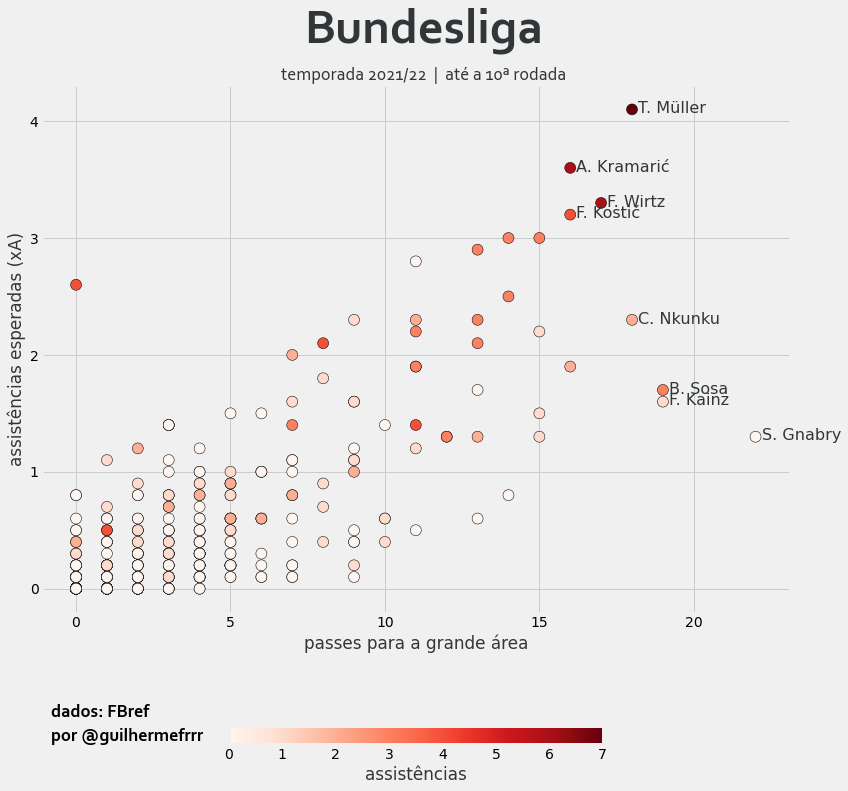

In [82]:
# Gráfico
fig, ax = plt.subplots(figsize = (12, 12))
#fig.set_facecolor('#F7F7F2')
#ax.patch.set_facecolor('#F7F7F2')

# Estilo do gráfico
plt.style.use('fivethirtyeight')

# Pontos no gráfico
plt.scatter(x = df['PPA'], y = df['xA'], c = df['Ast'], s = 120, cmap = 'Reds', edgecolor = 'black', linewidth = 0.5)

# Barra de cor
cbar = plt.colorbar(format = '%.f', shrink = 0.5, orientation = 'horizontal')
cbar.set_label('assistências', c = '#313638')
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6, 7])

# Labels 
plt.xlabel('passes para a grande área', c = '#313638')
plt.ylabel('assistências esperadas (xA)', c = '#313638')

# Título, subtítulo e créditos
plt.suptitle('Bundesliga', fontsize = 50, fontname = 'Corbel', fontweight='bold', c = '#313638')
plt.title('temporada 2021/22  |  até a 10ª rodada', x = 0.51, fontsize = 18, fontname = 'Corbel', c = '#313638')
plt.text(s = 'dados: FBref', y = -1.1, x = -0.8, fontsize = 18, fontname = 'Corbel', fontweight='bold')
plt.text(s = 'por @guilhermefrrr', y = -1.3, x = -0.8, fontsize = 18, fontname = 'Corbel', fontweight='bold')

# Nomes dos jogadores. A cada iteração é plotado no gráfico o nome de um dos líderes em PPA e em xA
for x in range(0, 5):
    plt.text(x = df_PPA['PPA'][x] + 0.2, y = df_PPA['xA'][x] - 0.03, fontsize = 16, c = '#313638', 
             s = '{}. {}'.format(df_PPA['Player'][x][0], df_PPA['Player'][x].split(' ')[1]))
    
for x in range(1, 4):
    plt.text(x = df_xA['PPA'][x] + 0.2, y = df_xA['xA'][x] - 0.03, fontsize = 16, c = '#313638', 
             s = '{}. {}'.format(df_xA['Player'][x][0], df_xA['Player'][x].split(' ')[1]))
    # A variável s ficou complexa para não mostrar nome e sobrenome completos no gráfico
    # Fiz ajustes nas variáveis x e y para ajustar levemente onde os nomes aparecem no gráfico
    
# Adaptação para o caso de nomes no gráfico ficarem sobrepostos
#plt.text(x = 18.8, y = 1.13, fontsize = 16, s = 'F. Kainz')
#plt.text(x = 20, y = 1.38, fontsize = 16, s = 'S. Gnabry')
#plt.text(x = 5.5, y = 2.46, fontsize = 16, s = 'C. Günter / J. Kimmich')
#plt.text(x = 10.25, y = 2.16, fontsize = 16, s = 'J. Hofmann')

# Método para limpar espaços em branco e ajustar a figura
fig.tight_layout()

# Salvar imagem?
plt.savefig('xAPPA10.png', dpi = 300)

# A cada atualização, vou precisar mudar poucas coisas no código:
# 1) O subtítulo
# 2) As ticks da color bar